# DataSet : https://bit.ly/2TK5Xn5

In [1]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [8]:
terror_df = pd.read_csv("globalterrorism.csv", encoding = 'latin-1')
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
terror_df.describe(include='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


In [11]:
terror_df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [12]:
terror_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
terror_df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [14]:
terror_df['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

In [15]:
print("Countries with the most attacks:",terror_df['country_txt'].value_counts().index)

Countries with the most attacks: Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey',
       ...
       'Vatican City', 'Falkland Islands', 'St. Lucia', 'North Korea',
       'New Hebrides', 'International', 'Wallis and Futuna', 'South Vietnam',
       'Andorra', 'Antigua and Barbuda'],
      dtype='object', length=205)


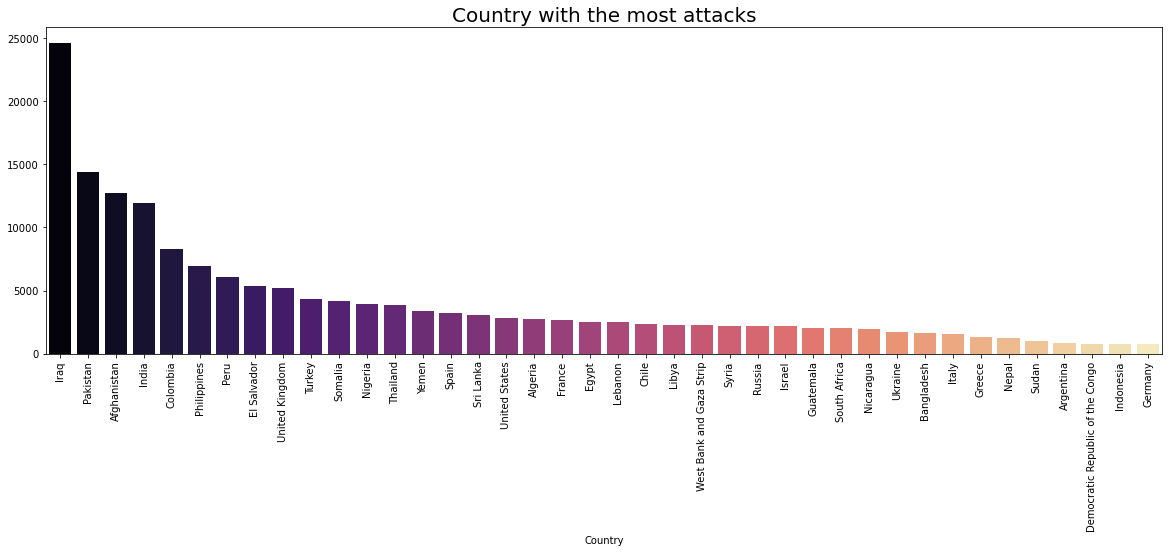

In [16]:
plt.subplots(figsize=(20, 6))
sns.barplot(terror_df['country_txt'].value_counts().index[:40],terror_df['country_txt'].value_counts()[:40].values,palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title('Country with the most attacks', fontsize =20)
plt.show()

In [17]:
print("Country with the most attacks:",terror_df['country_txt'].value_counts().idxmax())

Country with the most attacks: Iraq


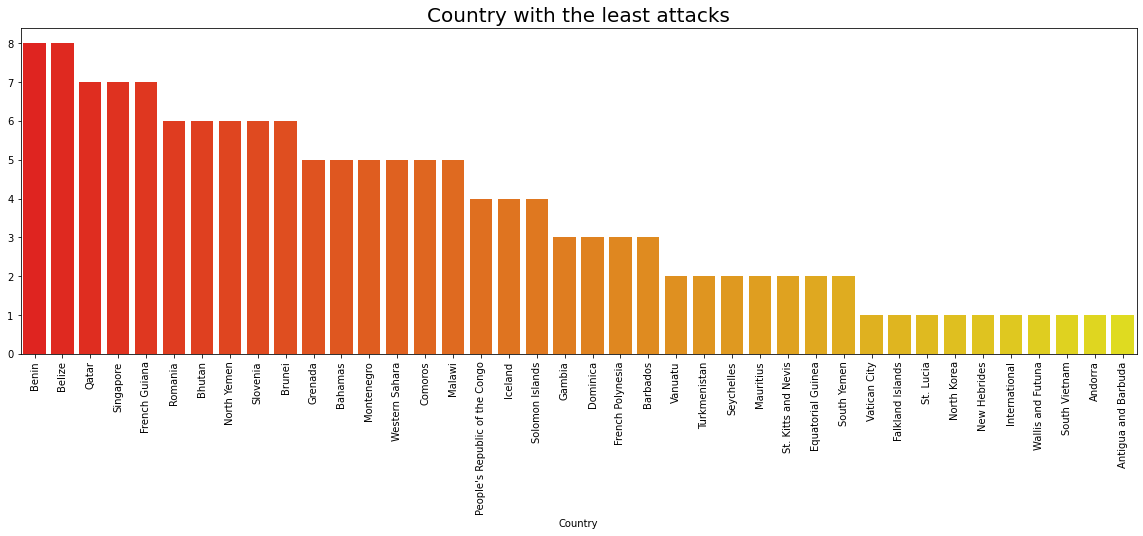

In [18]:
plt.subplots(figsize=(20, 6))
sns.barplot(terror_df['country_txt'].value_counts().index[-40:],terror_df['country_txt'].value_counts()[-40:].values,palette='autumn')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title('Country with the least attacks', fontsize = 20)
plt.show()

In [19]:
print("Least targetted Country is:", terror_df['country_txt'].value_counts().index[-1])

Least targetted Country is: Antigua and Barbuda


In [20]:
terror_df['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [21]:
print("Region with the most attacks:",terror_df['region_txt'].value_counts().index)

Region with the most attacks: Index(['Middle East & North Africa', 'South Asia', 'South America',
       'Sub-Saharan Africa', 'Western Europe', 'Southeast Asia',
       'Central America & Caribbean', 'Eastern Europe', 'North America',
       'East Asia', 'Central Asia', 'Australasia & Oceania'],
      dtype='object')


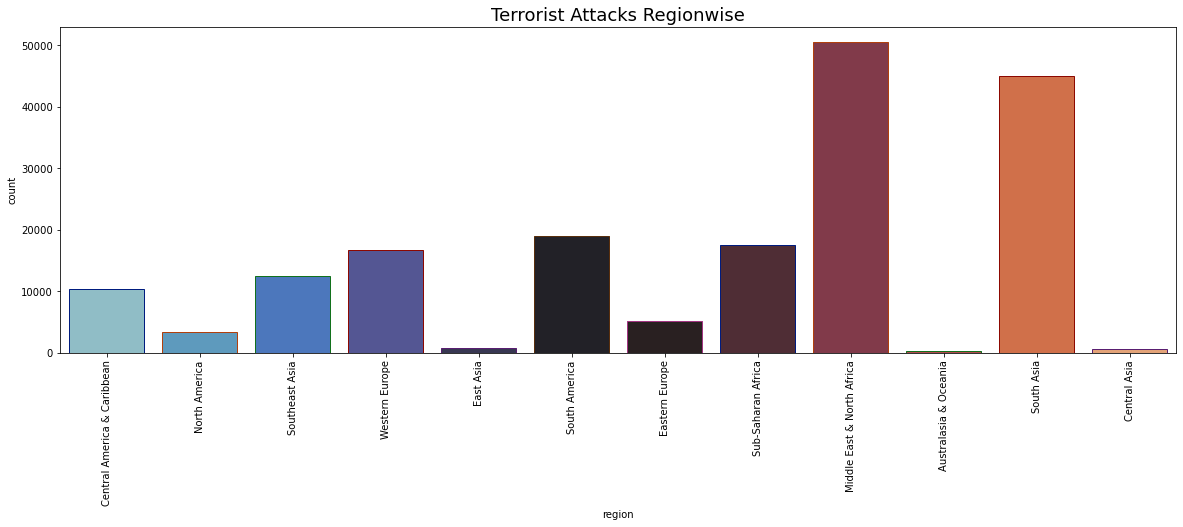

In [22]:
plt.subplots(figsize = (20, 6))
sns.countplot('region_txt', data = terror_df,palette='icefire',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('region')
plt.title('Terrorist Attacks Regionwise', fontsize = 18)
plt.show()

In [23]:
print("Region with the most attacks:",terror_df['region_txt'].value_counts().idxmax())

Region with the most attacks: Middle East & North Africa


In [24]:
terror_df['city'].value_counts()

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64

In [25]:
print("City with the most attacks:",terror_df['city'].value_counts().index)

City with the most attacks: Index(['Unknown', 'Baghdad', 'Karachi', 'Lima', 'Mosul', 'Belfast', 'Santiago',
       'Mogadishu', 'San Salvador', 'Istanbul',
       ...
       'Mallah', 'Nadia', 'Nittikai Kulam', 'Panchkula', 'Ullensaker',
       'Hotwag', 'Ostend', 'Balughata', 'Jikoyi', 'Kubentog'],
      dtype='object', length=36674)


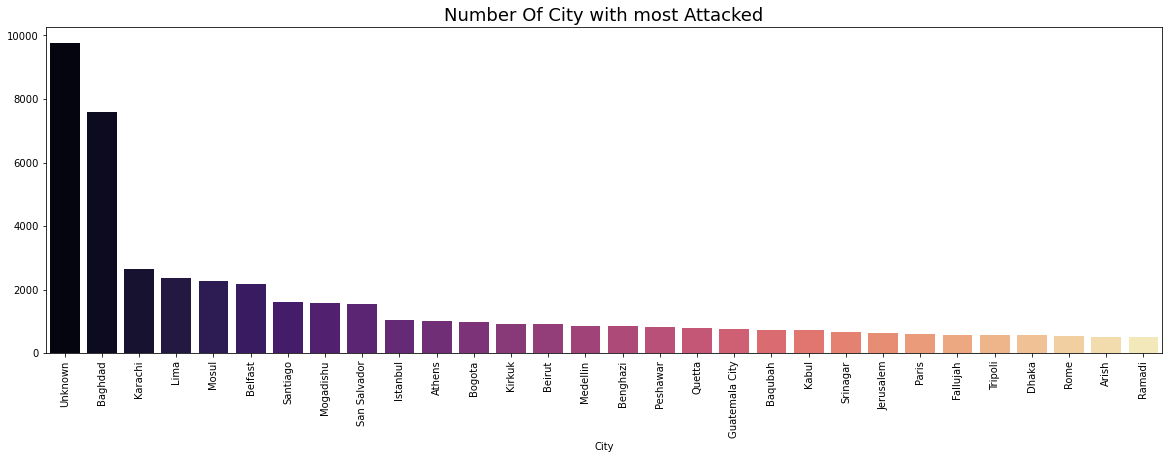

In [26]:
plt.subplots(figsize = (20, 6))

sns.barplot(terror_df['city'].value_counts().index[:30],terror_df['city'].value_counts()[:30].values,palette='magma')

plt.xticks(rotation=90)
plt.xlabel('City')
plt.title('Number Of City with most Attacked', fontsize = 18)
plt.show()


In [27]:
print("City with the most attacks:",terror_df['region_txt'].value_counts().idxmax())

City with the most attacks: Middle East & North Africa


In [28]:
terror_df["iyear"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [29]:
terror_df['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

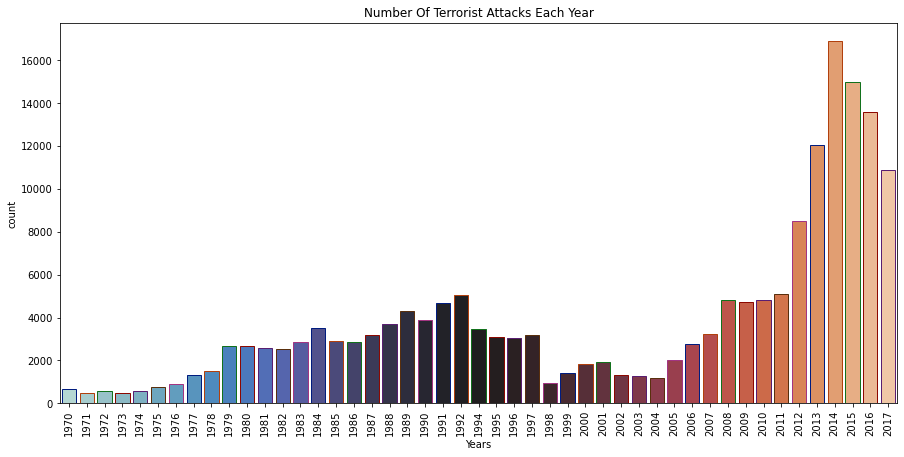

In [30]:
plt.subplots(figsize = (15, 7))
sns.countplot('iyear', data = terror_df,palette='icefire',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Number Of Terrorist Attacks Each Year')
plt.show()

In [31]:
print("Year with the most attacks:",terror_df['iyear'].value_counts().idxmax())

Year with the most attacks: 2014


In [32]:
terror_df["imonth"].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: imonth, dtype: int64

In [33]:
print("Month with the most attacks:",terror_df['imonth'].value_counts().index)

Month with the most attacks: Int64Index([5, 7, 8, 10, 6, 3, 4, 1, 11, 9, 2, 12, 0], dtype='int64')


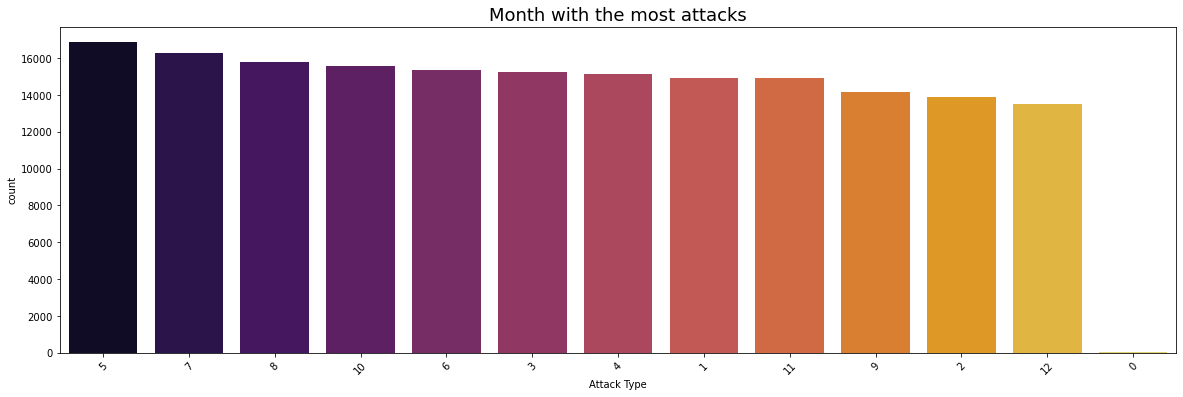

In [34]:
plt.subplots(figsize=(20,6))
sns.countplot('imonth',data=terror_df,palette='inferno',order=terror_df['imonth'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Attack Type')
plt.title('Month with the most attacks', fontsize = 18)
plt.show()

In [35]:
print("Month with the most attacks:",terror_df['imonth'].value_counts().idxmax())

Month with the most attacks: 5


In [36]:
terror_df["iday"].value_counts()

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      891
Name: iday, dtype: int64

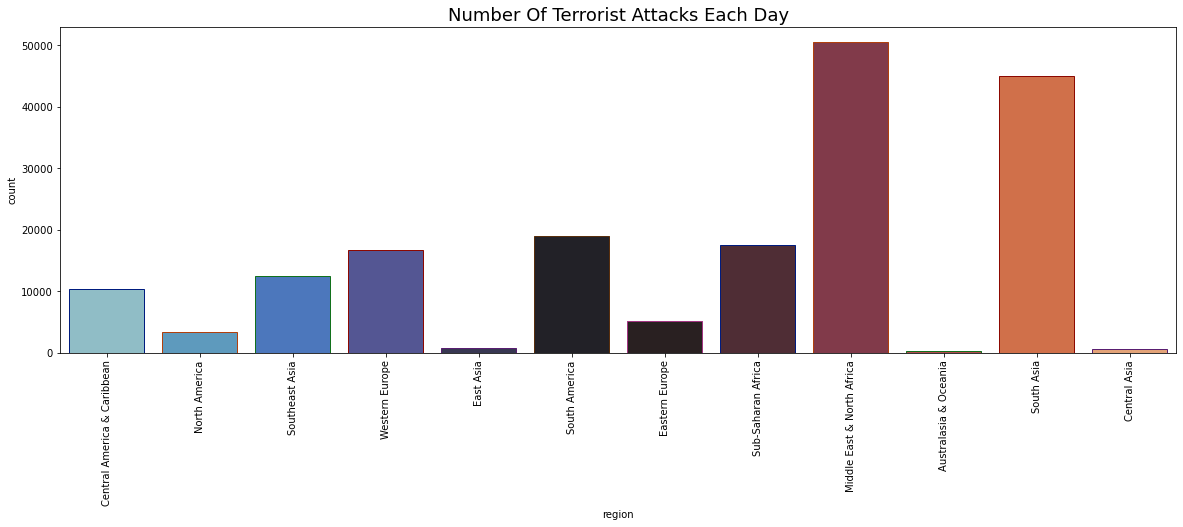

In [39]:
plt.subplots(figsize = (20, 6))
sns.countplot('region_txt', data = terror_df,palette='icefire',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('region')
plt.title('Number Of Terrorist Attacks Each Day', fontsize = 18)
plt.show()

In [38]:
print("Day with the most attacks:",terror_df['iday'].value_counts().idxmax())

Day with the most attacks: 15


In [40]:
terror_df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

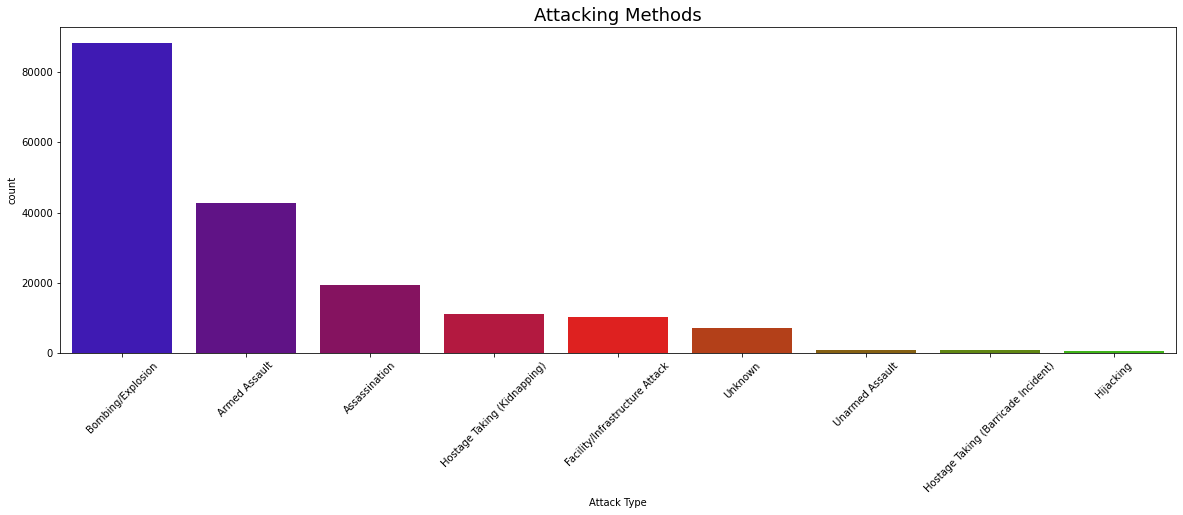

In [41]:
plt.subplots(figsize=(20,6))
sns.countplot('attacktype1_txt',data=terror_df,palette='brg',order=terror_df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Attack Type')
plt.title('Attacking Methods', fontsize = 18)
plt.show()

In [42]:
print("Maximally prefered type of Attacks:", terror_df['attacktype1_txt'].value_counts().index[0])

Maximally prefered type of Attacks: Bombing/Explosion


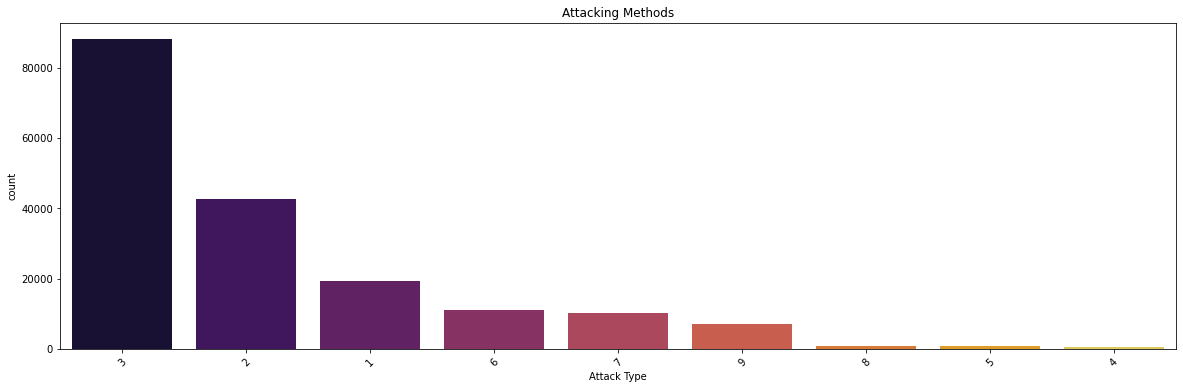

In [43]:
plt.subplots(figsize=(20,6))
sns.countplot('attacktype1',data=terror_df,palette='inferno',order=terror_df['attacktype1'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Attack Type')
plt.title('Attacking Methods')
plt.show()

In [46]:
print("Most Attack Types1:",terror_df['attacktype1'].value_counts().idxmax())

Most Attack Types1: 3


In [47]:
terror_df['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

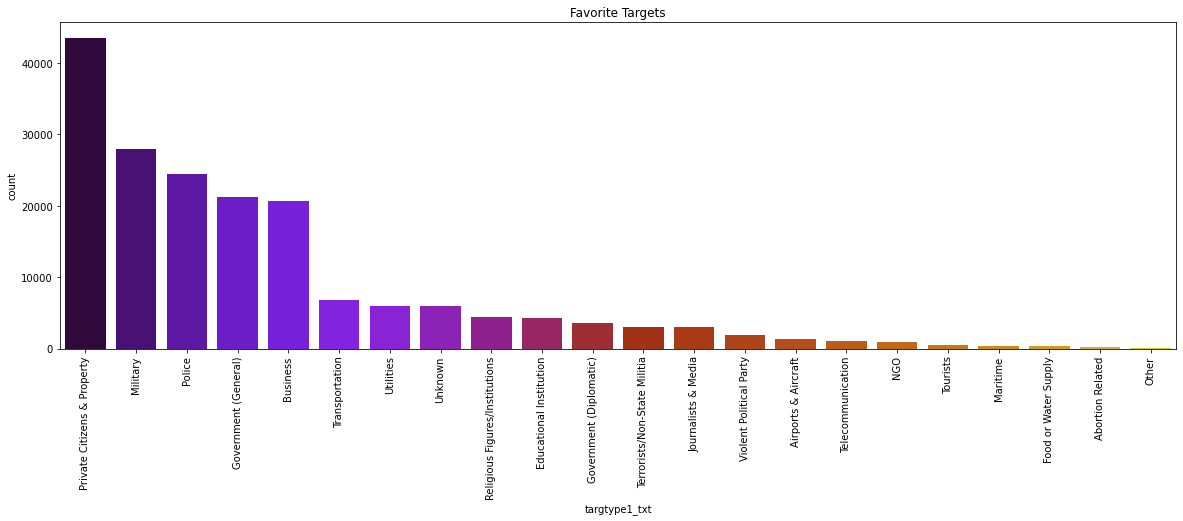

In [48]:
plt.subplots(figsize=(20,6))
sns.countplot(terror_df['targtype1_txt'],palette='gnuplot',order=terror_df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

In [49]:
print("Target with the most attacks:",terror_df['targtype1_txt'].value_counts().idxmax())

Target with the most attacks: Private Citizens & Property


In [50]:
df = terror_df.groupby('iyear')['country_txt'].sum().to_frame()
df

,country_txt
iyear,
1970,Dominican RepublicMexicoPhilippinesGreeceJapan...
1971,United StatesWest Germany (FRG)United StatesUn...
1972,PanamaPhilippinesKuwaitSpainArgentinaUnited Ki...
1973,ColombiaIrelandDominican RepublicUnited Kingdo...
1974,ItalyFranceItalyBoliviaUnited KingdomArgentina...
1975,PakistanSpainSpainSpainUnited KingdomNetherlan...
1976,TurkeyTurkeyPortugalWest Germany (FRG)United S...
1977,JapanJapanJapanFranceFranceSpainItalySpainItal...
1978,BrazilEl SalvadorItalyItalyItalyJapanNetherlan...


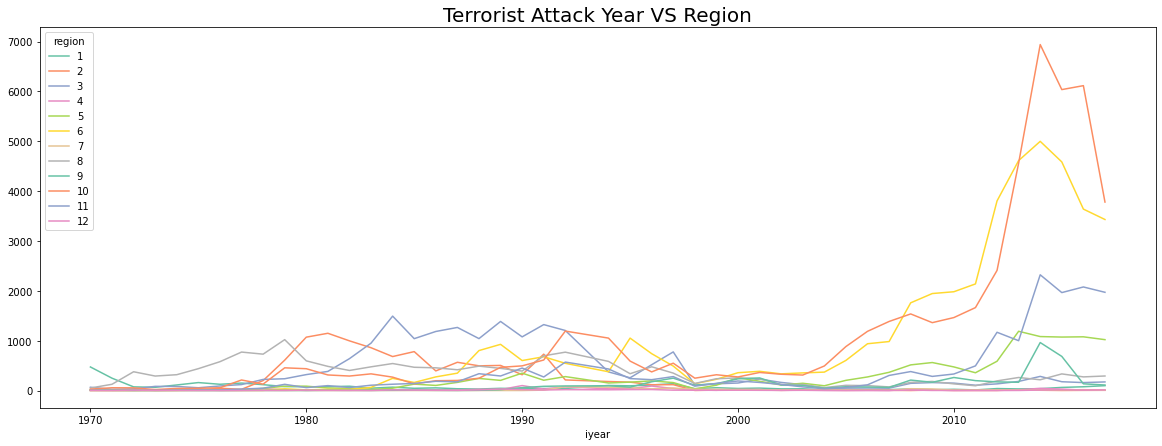

In [51]:
df_region=pd.crosstab(terror_df.iyear,terror_df.region)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Region", fontsize=20)
fig.set_size_inches(20,7)
plt.show()

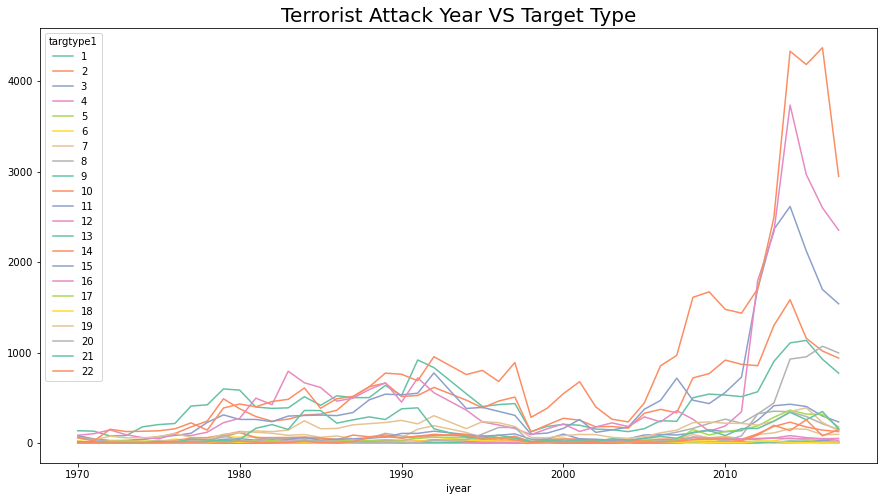

In [52]:
df_region=pd.crosstab(terror_df.iyear, terror_df.targtype1)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Target Type", fontsize=20)
fig.set_size_inches(15,8)
plt.show()